# Cell simulation

### Importing Libraries

In [1]:
import pathlib
import sys
import matplotlib.pyplot as plt 
plt.style.use("dark_background")

### Paths for videos and directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[0].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[0].joinpath('DataBases','videos_for_sim_cell')
rsnaped_dir = current_dir.parents[0].joinpath('rsnaped')
gene_file = current_dir.parents[0].joinpath('DataBases','gene_files','KDM5B_withTags.txt')
masks_dir = current_dir.parents[0].joinpath('DataBases','masks_for_sim_cell')
# Importing rSNAPed
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
rsp.Banner().print_banner()

 
  ██████╗░░██████╗███╗░░██╗░█████╗░██████╗░███████╗██████╗░ 
  ██╔══██╗██╔════╝████╗░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗ 
  ██████╔╝╚█████╗░██╔██╗██║███████║██████╔╝█████╗░░██║░░██║ 
  ██╔══██╗░╚═══██╗██║╚████║██╔══██║██╔═══╝░██╔══╝░░██║░░██║ 
  ██║░░██║██████╔╝██║░╚███║██║░░██║██║░░░░░███████╗██████╔╝ 
             by : L. Aguilera, T. Stasevich, and B. Munsky 


### Parameters for the simulation

In [3]:
# Parameters for the simulated cell
number_of_simulated_cells = 1        # 
number_spots_per_cell = 60           # 

step_size_in_sec = 1
min_percentage_time_tracking = 0.3   # (normalized) minimum time to consider a trajectory.
average_cell_diameter = 400
diffusion_coefficient = 0.05         # This value must have units of micrometers_square_per_seconds
microns_per_pixel = 0.13
spot_size = 5                                  # spot size for the simulation and tracking.
spot_sigma = 1
elongation_rate = 20
initiation_rate = 0.03
simulated_RNA_intensities_method = 'random'
basal_intensity_in_background_video = 10000
scale_intensity_in_base_video = False
intensity_scale_ch0 = 1
intensity_scale_ch1 = 1
intensity_scale_ch2 = None
select_background_cell_index = 0               # Integer in range 0 to 8, or use None to select a random value. 
perform_video_augmentation = False 
store_videos_in_memory = False
save_as_gif = False 


In [4]:
# Plotting different conditions
simulate_Harringtonin = False
simulate_FRAP = False
simulate_normal = True

if simulate_Harringtonin == True:
    use_Harringtonin = True
    use_FRAP = False
    simulation_time_in_sec = 400 
    perturbation_time_start = 200
    perturbation_time_stop = None
    name_plot='sim_cell_HT.pdf'
    perturbation=True
    perturbation_label='HT'
    perturbation_time=perturbation_time_start
    
if simulate_FRAP == True:
    use_Harringtonin = False
    use_FRAP = True
    simulation_time_in_sec = 400
    perturbation_time_start = 200
    perturbation_time_stop = 201
    name_plot='sim_cell_FRAP.pdf'
    perturbation=True
    perturbation_label='FRAP'
    perturbation_time=perturbation_time_start
    
if simulate_normal == True:
    use_Harringtonin = False
    use_FRAP = False
    simulation_time_in_sec = 400
    perturbation_time_start = 0
    perturbation_time_stop = None
    name_plot='sim_cell.pdf'
    perturbation_label=None
    perturbation=False
    perturbation_time=None

### Parameters for cell segmentation and spot tracking

In [5]:
# Parameters used for tracking
intensity_calculation_method = 'gaussian_fit'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area'             # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1              # 0 not using, 1 is using optimization
selected_channel_tracking = 0
selected_channel_segmentation = 1
frame_selection_empty_video = 'gaussian'       # Options are: 'constant' , 'shuffle' and 'loop' 'linear_interpolation', 'gaussian', 'poisson'
dataframe_format = 'long'                      # Options are: 'short'  'long'
show_plot = False                              # Flag to show plots for the detection and tracking process.
particle_detection_size = spot_size

## Running the simulations

____

In [6]:
list_videos, list_masks, list_dataframe_simulated_cell, merged_dataframe_simulated_cells, ssa_trajectories, list_files_names, video_path, dataframe_path = rsp.simulate_cell( video_dir, 
                                                                        list_gene_sequences = gene_file,
                                                                        list_number_spots= number_spots_per_cell,
                                                                        list_target_channels_proteins = 1,
                                                                        list_target_channels_mRNA = 0, 
                                                                        list_diffusion_coefficients=diffusion_coefficient,
                                                                        list_elongation_rates=elongation_rate,
                                                                        list_initiation_rates=initiation_rate,
                                                                        masks_dir=masks_dir, 
                                                                        list_label_names=1,
                                                                        number_cells = number_of_simulated_cells,
                                                                        simulation_time_in_sec = simulation_time_in_sec,
                                                                        step_size_in_sec = step_size_in_sec,
                                                                        save_as_gif = save_as_gif,
                                                                        frame_selection_empty_video=frame_selection_empty_video,
                                                                        spot_size = spot_size,
                                                                        spot_sigma = spot_sigma,
                                                                        intensity_scale_ch0 = intensity_scale_ch0,
                                                                        intensity_scale_ch1 = intensity_scale_ch1,
                                                                        intensity_scale_ch2 = intensity_scale_ch2,
                                                                        dataframe_format = 'long',
                                                                        use_Harringtonin=use_Harringtonin,
                                                                        use_FRAP=use_FRAP,
                                                                        perturbation_time_start=perturbation_time_start,
                                                                        perturbation_time_stop=perturbation_time_stop,
                                                                        simulated_RNA_intensities_method=simulated_RNA_intensities_method,
                                                                        store_videos_in_memory= store_videos_in_memory,
                                                                        scale_intensity_in_base_video=scale_intensity_in_base_video,
                                                                        basal_intensity_in_background_video=basal_intensity_in_background_video,
                                                                        microns_per_pixel=microns_per_pixel,
                                                                        select_background_cell_index=select_background_cell_index,
                                                                        perform_video_augmentation=perform_video_augmentation)

The simulation dataframes are stored here: /home/luisub/Desktop/rsnaped/notebooks_final/temp_simulation/bg_gaussian_rna_random_ke_20_ki_0_03_kd_0_05_spots_60_time_400_cells_1_int0_1_int1_1_int2_None/dataframe_bg_gaussian_rna_random_ke_20_ki_0_03_kd_0_05_spots_60_time_400_cells_1_int0_1_int1_1_int2_None
Time to generate simulated data: 33  sec


### Loading simulated image and dataframe

In [7]:
## Reads the folder with the results and import the simulations as lists
path_files, list_files_names, list_videos, number_images = rsp.Utilities.read_files_in_directory(directory=video_path, extension_of_files_to_look_for = 'tif',return_images_in_list=True)
# Loading images and dataframes
image = list_videos[0]
df = list_dataframe_simulated_cell[0].copy()

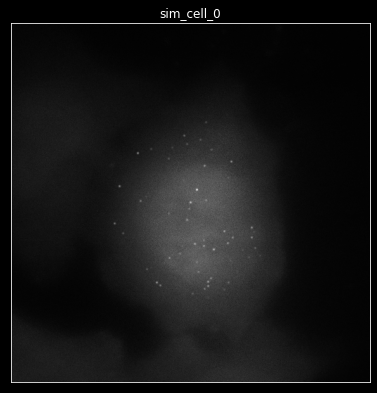

In [8]:
# Showing the simulated images
rsp.VisualizerImage(list_videos,list_files_names=list_files_names,selected_channel =1,selected_time_point= 0,normalize=0,individual_figure_size=7).plot()
del list_videos

## Locating particles in simulated video.

____

In [9]:
list_DataFrame_particles_intensities, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( files_dir_path_processing=video_path,
                                                                                                                            particle_size=particle_detection_size,
                                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                                            show_plot=show_plot,
                                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                                            real_positions_dataframe = list_dataframe_simulated_cell,
                                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                                            print_process_times=True,
                                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                                            dataframe_format=dataframe_format)

mask time: 8  sec
The number of detected trajectories is:  46
The selected intensity threshold is:  210.0 

tracking time: 12  sec
intensity calculation time: 5  sec
46
Progress:  1 / 1
Time to process data: 27  sec


In [10]:
df = list_dataframe_simulated_cell[0]
df.head()

,image_number,cell_number,particle,frame,ch0_int_mean,ch1_int_mean,ch2_int_mean,ch0_int_std,ch1_int_std,ch2_int_std,...,ch0_bg_int_mean,ch1_bg_int_mean,ch2_bg_int_mean,ch0_bg_int_std,ch1_bg_int_std,ch2_bg_int_std,ch0_SSA_UMP,ch1_SSA_UMP,ch2_SSA_UMP,Classification
0,0,0,0,0,211.64,1833.23,0.0,245.61,2040.07,0.0,...,1825.96,8683.05,0.0,132.83,628.83,0.0,8.283871,3.0,0.0,1
1,0,0,0,1,194.71,1736.16,0.0,261.64,2048.49,0.0,...,1907.69,9115.52,0.0,222.88,1344.97,0.0,9.491681,3.0,0.0,1
2,0,0,0,2,246.82,1542.25,0.0,295.37,2132.17,0.0,...,1862.30,8952.67,0.0,96.29,582.73,0.0,10.065205,3.0,0.0,1
3,0,0,0,3,244.96,1487.74,0.0,266.10,2098.87,0.0,...,1935.80,9500.82,0.0,204.52,1706.97,0.0,9.557677,3.1,0.0,1
4,0,0,0,4,203.04,1710.51,0.0,246.11,2141.60,0.0,...,1917.16,9292.12,0.0,234.51,1450.01,0.0,9.558283,3.3,0.0,1


### Figure 1. Cell simulation, ssa, and video trajectories.

____

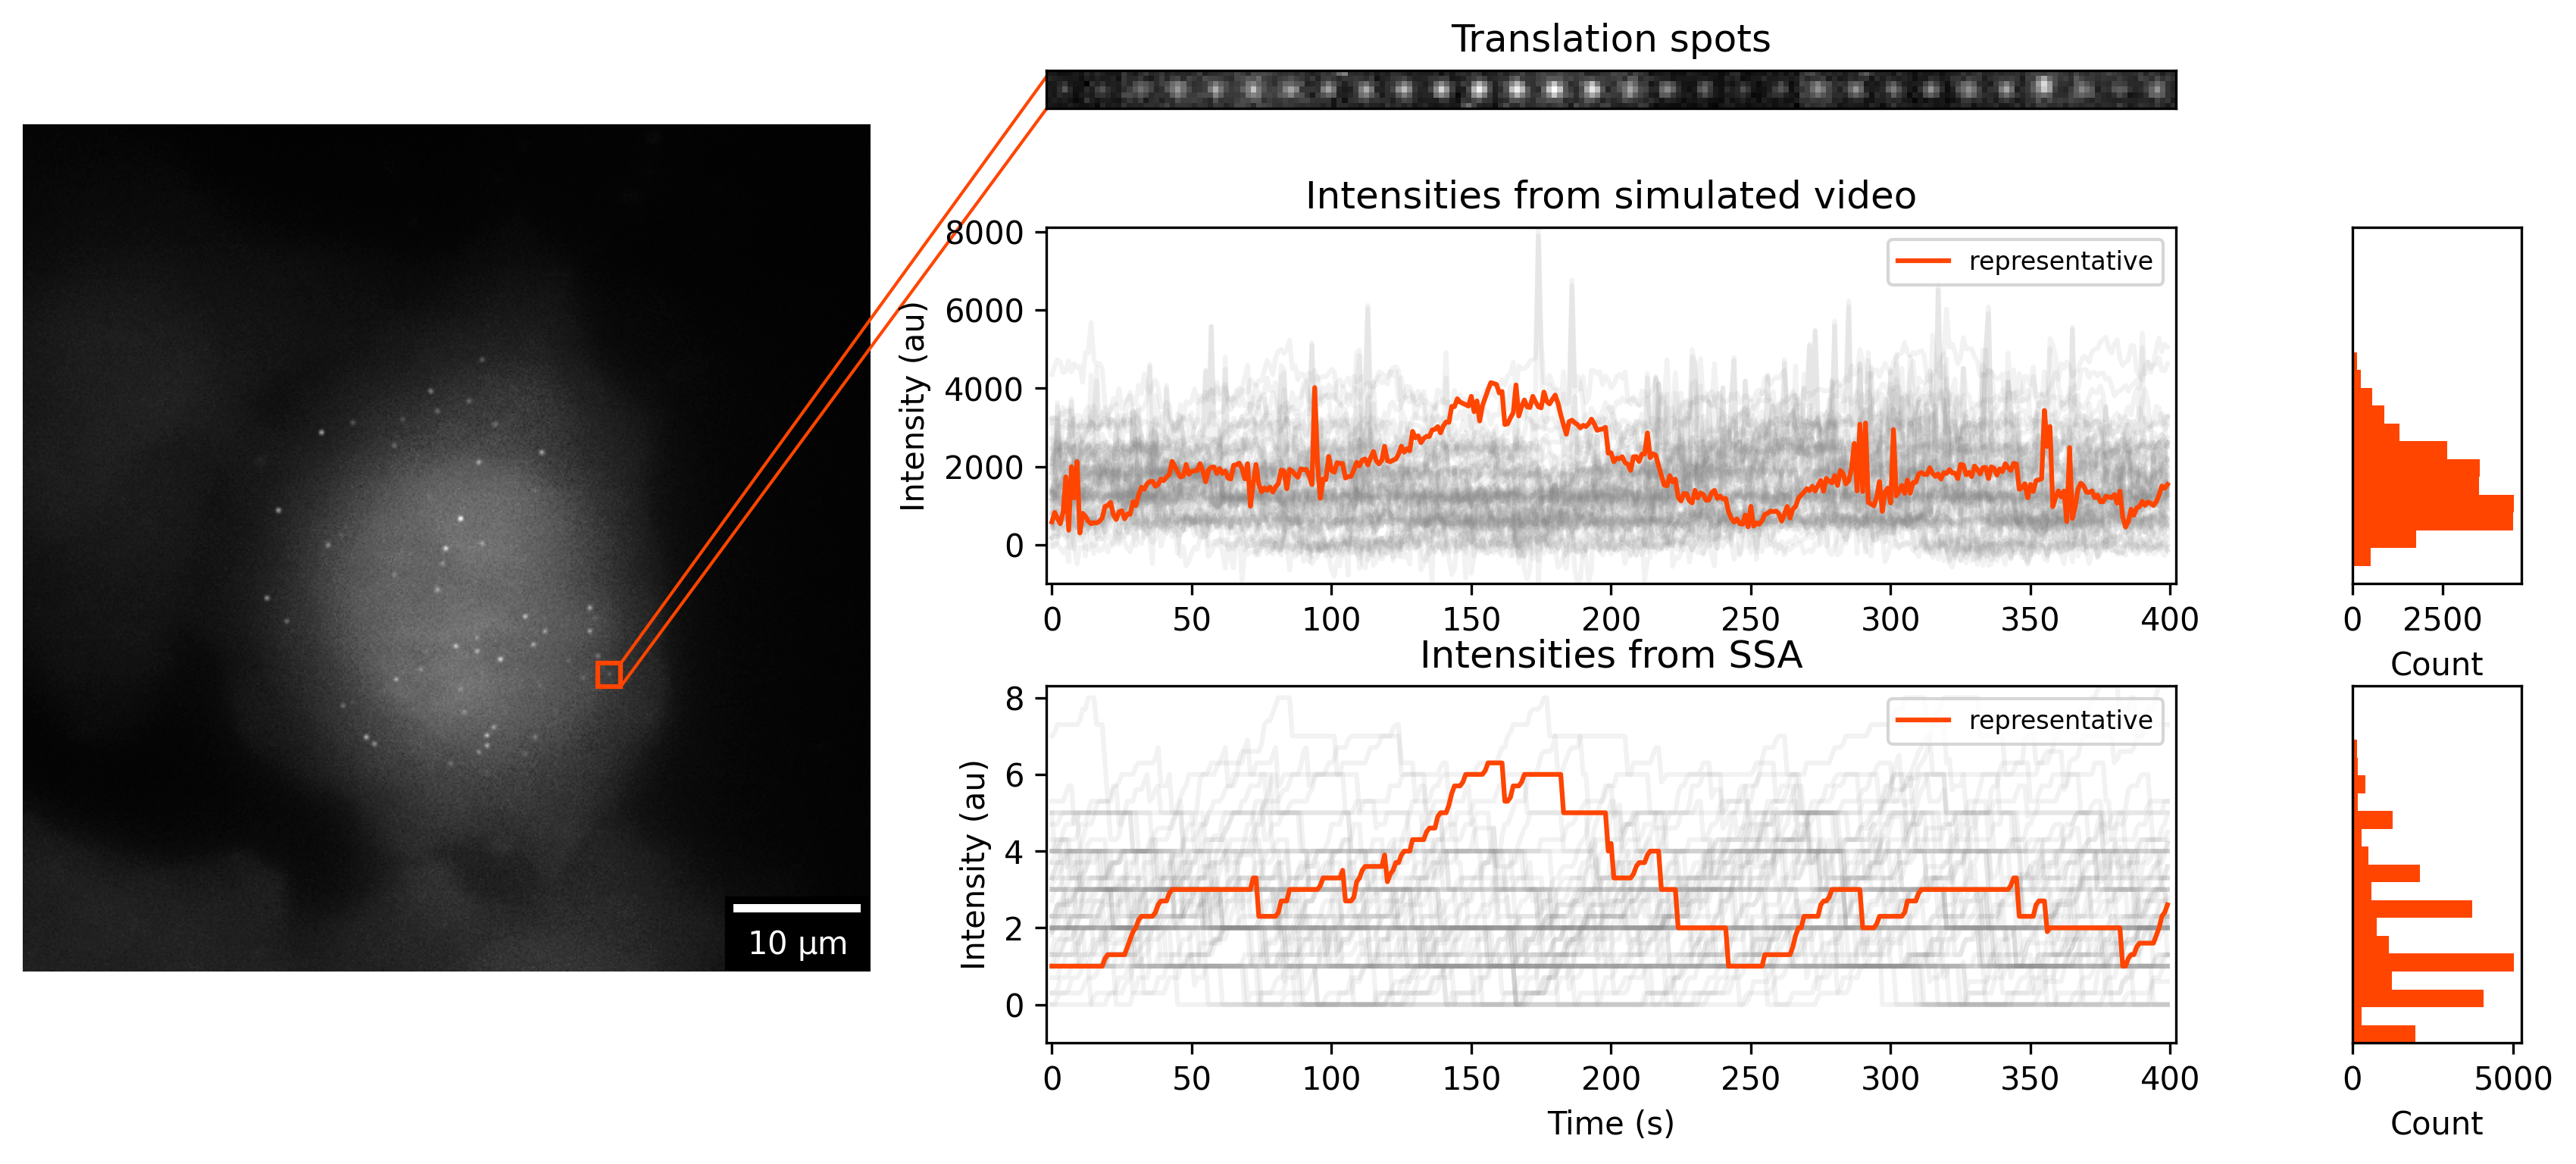

In [11]:
rsp.Plots.plot_cell_trajectories_ssa_crops(image, 
                                           df,
                                           spot_size=5,
                                           selected_channel=1, 
                                           selected_trajectory=None, 
                                           microns_per_pixel=microns_per_pixel,
                                           name_plot=name_plot,
                                           perturbation=perturbation,
                                           perturbation_label=perturbation_label,
                                           perturbation_time=perturbation_time)